In [46]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [47]:
data = pd.read_csv ("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [48]:
df = data.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [49]:
df = df.drop(['sex','bmi','smoker','region'], axis = 1)
df

,age,children,charges
0,19,0,16884.92400
1,18,1,1725.55230
2,28,3,4449.46200
3,33,0,21984.47061
4,32,0,3866.85520
...,...,...,...
1333,50,3,10600.54830
1334,18,0,2205.98080
1335,18,0,1629.83350
1336,21,0,2007.94500


In [50]:
wcss = []
for i in range (1,16):
    kmModel = KMeans(n_clusters=i, n_init = 15)
    kmModel.fit(df)
    wcss.append(kmModel.inertia_)

C:\Users\Human Akmal Juanda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Human Akmal Juanda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Human Akmal Juanda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Human Akmal Juanda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

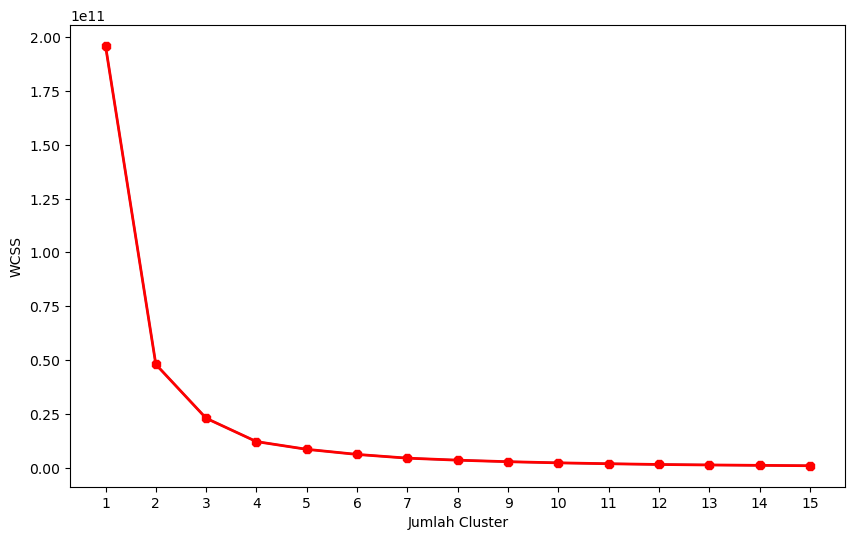

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16), wcss)
plt.plot(range(1,16), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('Jumlah Cluster')
plt.xticks(np.arange(1,16,1))
plt.ylabel('WCSS')
plt.show()

In [60]:
kmModelFix= KMeans(n_clusters=2 , n_init=15)
kmModelFix.fit(df)
hasil_prediksi = kmModelFix.predict(df)
print(hasil_prediksi)

C:\Users\Human Akmal Juanda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[1 1 1 ... 1 1 0]


In [61]:
df['Label'] = hasil_prediksi
df.head()

,age,children,charges,Label
0,19,0,16884.92400,1
1,18,1,1725.55230,1
2,28,3,4449.46200,1
3,33,0,21984.47061,1
4,32,0,3866.85520,1


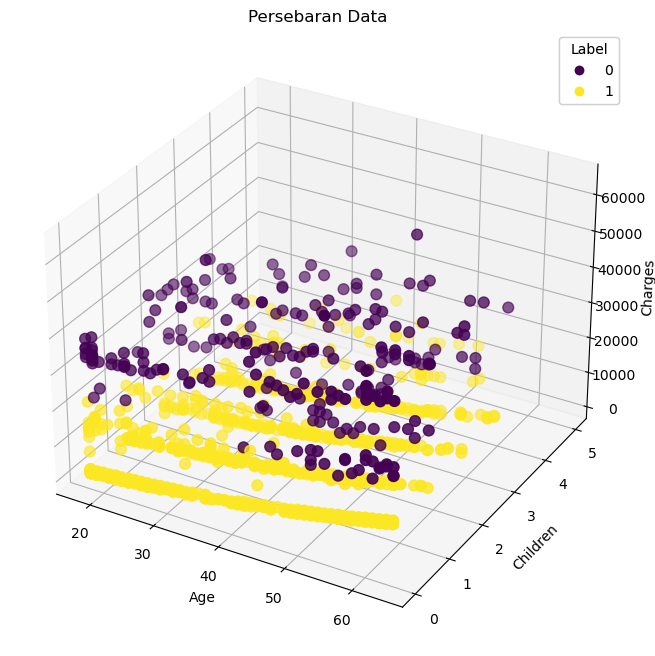

In [62]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['age'], df['children'], df['charges'], c=df['Label'], cmap='viridis', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Children')
ax.set_zlabel('Charges')
ax.set_title('Persebaran Data')
legend1 = ax.legend(*scatter.legend_elements(), title='Label')
ax.add_artist(legend1)
plt.show()